In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [139]:
def load_dataset():
    """Ma'lumotlar to'plamini o'qib olish uchun funkisya"""
    dataset = pd.read_csv('googleplaystore.csv')
    return dataset
# Load the dataset
df = pd.read_csv("googleplaystore.csv")

In [140]:
def print_summarize_dataset(dataset):
    """Ma'lumotlar to'plamining statistik ma'lumotlar"""
    print(dataset.describe(include='all'))
    print(dataset.info())
    print(dataset.shape)
print_summarize_dataset(df)

           App Category       Rating Reviews                Size    Installs  \
count    10841    10841  9367.000000   10841               10841       10841   
unique    9660       34          NaN    6002                 462          22   
top     ROBLOX   FAMILY          NaN       0  Varies with device  1,000,000+   
freq         9     1972          NaN     596                1695        1579   
mean       NaN      NaN     4.193338     NaN                 NaN         NaN   
std        NaN      NaN     0.537431     NaN                 NaN         NaN   
min        NaN      NaN     1.000000     NaN                 NaN         NaN   
25%        NaN      NaN     4.000000     NaN                 NaN         NaN   
50%        NaN      NaN     4.300000     NaN                 NaN         NaN   
75%        NaN      NaN     4.500000     NaN                 NaN         NaN   
max        NaN      NaN    19.000000     NaN                 NaN         NaN   

         Type  Price Content Rating Gen

In [141]:
def clean_dataset(dataset):
    """Ma'lumotlar to'plamini tozalash"""
    dataset = dataset.drop_duplicates(subset=['App'], keep='first')

    dataset = dataset[dataset['Category'] != '1.9']
    dataset.loc[:, 'Category'] = dataset['Category'].str.replace('_', ' ').str.capitalize()

    dataset.dropna(subset=['Rating'], inplace=True)

    dataset['Reviews'] = dataset['Reviews'].astype(int)

    dataset['Size'] = dataset['Size'].str.replace('k', '').str.replace('M', '')
    dataset['Size'].replace('Varies with device', np.nan, inplace=True)
    dataset['Size'] = pd.to_numeric(dataset['Size'], errors='coerce')
    dataset['Size'].fillna(dataset['Size'].mean(), inplace=True)

    dataset['Installs'] = dataset['Installs'].str.replace(r',|\+', '', regex = True).astype(int)

    dataset['Type'] = dataset['Type'].replace({'Free': 1, 'Paid': 0}).astype(int)
    dataset.rename(columns={'Type': 'Free'}, inplace=True)

    dataset['Price'] = dataset['Price'].str.replace('$', '').astype(float)

    dataset['Content Rating'] = dataset['Content Rating'].str.replace('+', '')

    dataset['Genres'] = dataset['Genres'].replace({'&': 'and', ';': ', ', 'Education;Education': 'Education'}, regex=True)

    dataset['Last Updated'] = pd.to_datetime(dataset['Last Updated'])

    dataset.dropna(axis=0, inplace=True)
    dataset.reset_index(drop=True, inplace=True)
    return dataset
df = clean_dataset(df)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Free,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art and design,4.1,159,19.0,10000,1,0.0,Everyone,Art and Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,Art and design,3.9,967,14.0,500000,1,0.0,Everyone,"Art and Design, Pretend Play",2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art and design,4.7,87510,8.7,5000000,1,0.0,Everyone,Art and Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,Art and design,4.5,215644,25.0,50000000,1,0.0,Teen,Art and Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,Art and design,4.3,967,2.8,100000,1,0.0,Everyone,"Art and Design, Creativity",2018-06-20,1.1,4.4 and up


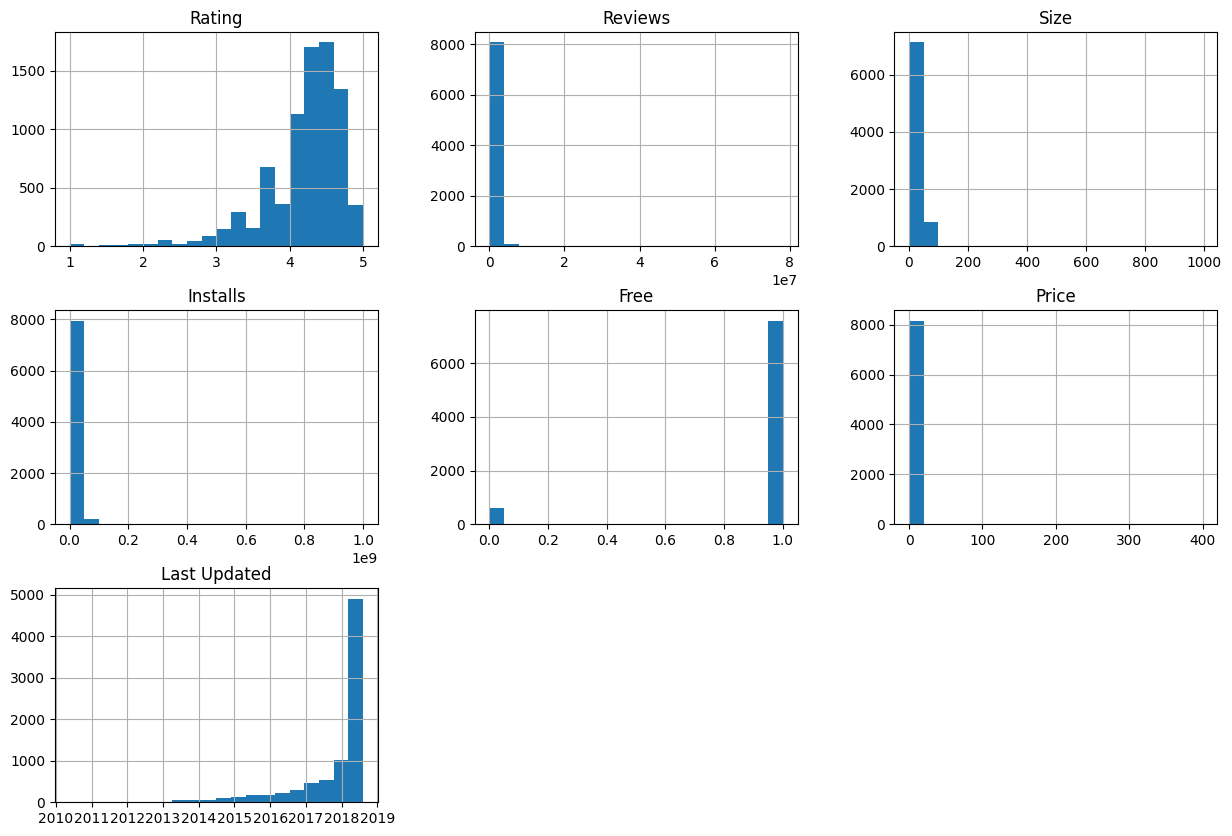

In [142]:
def print_histograms(dataset):
    """Ma'lumotlar to'plamining istoriyalarini chizish"""
    dataset.hist(figsize=(15, 10), bins=20)
    plt.show()
print_histograms(df)

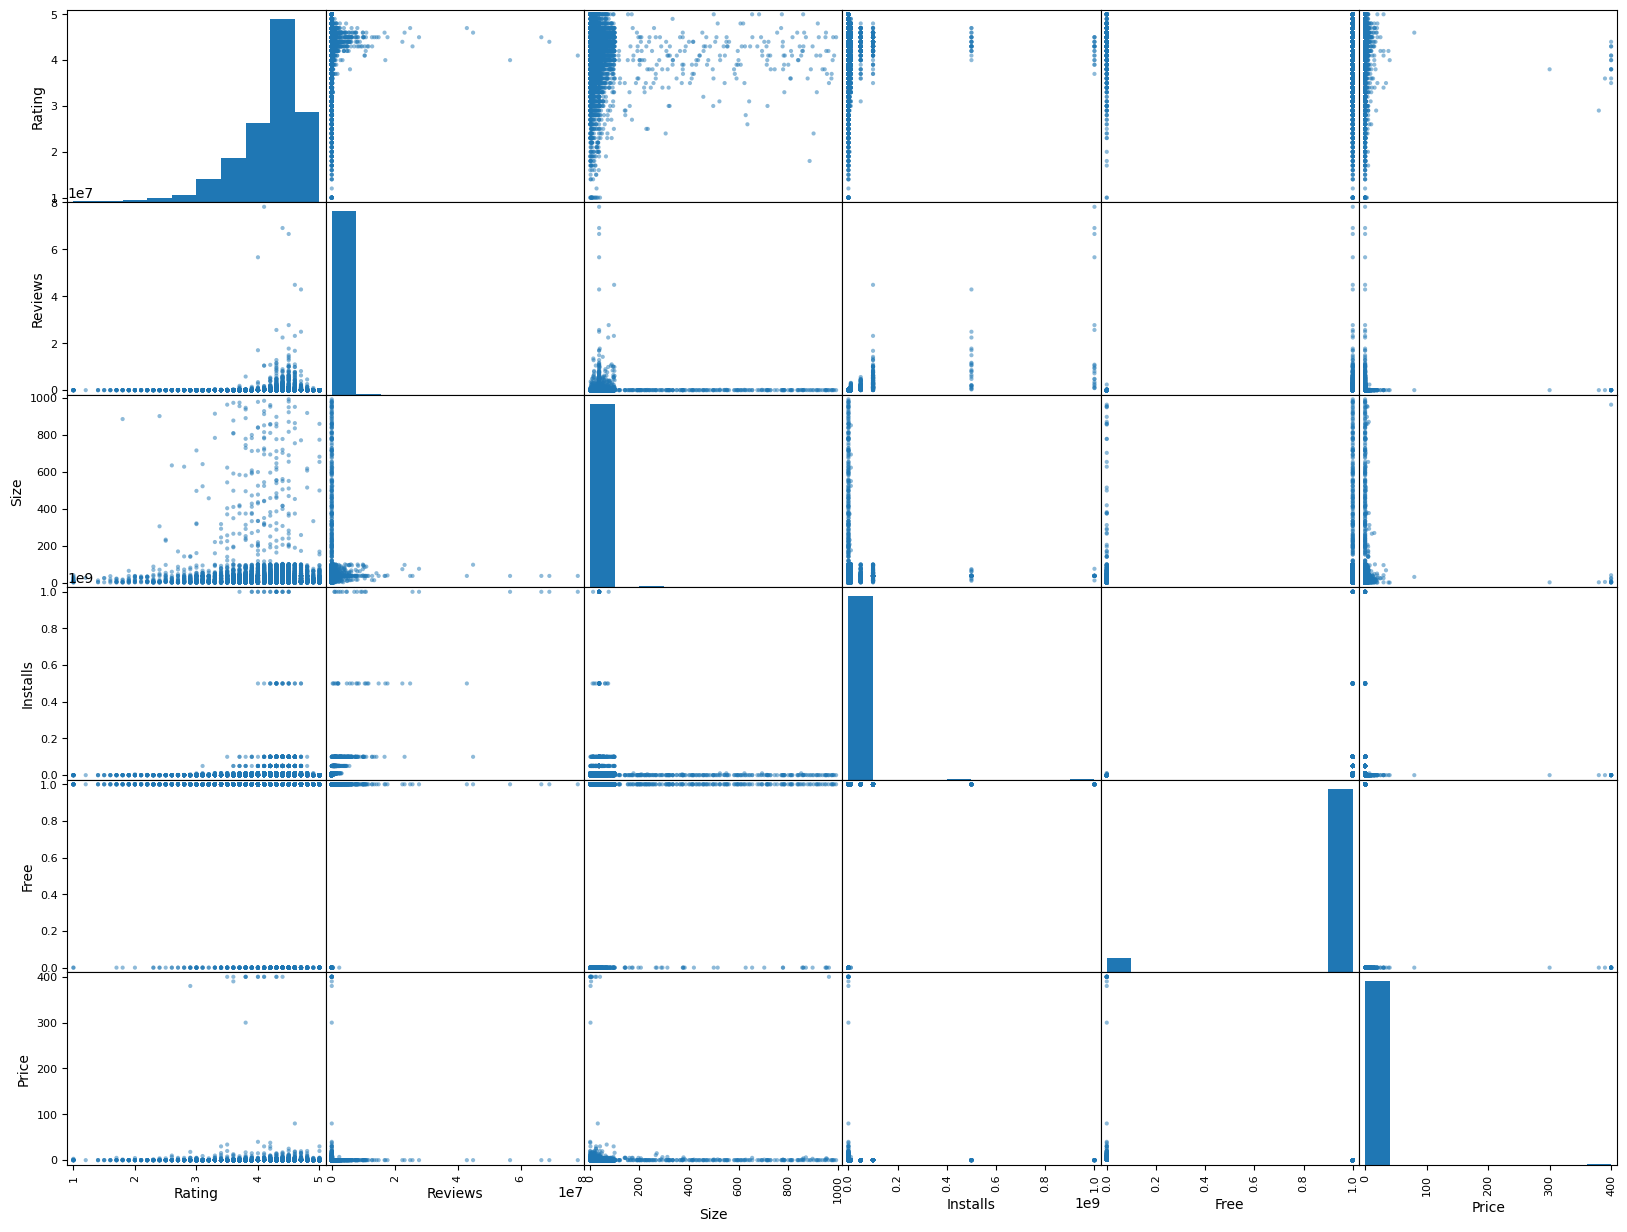

In [143]:
def print_scatter_matrix(dataset):
    """Ma'lumotlar to'plamining scatter matritsasi"""
    pd.plotting.scatter_matrix(dataset, figsize=(20,15))
    plt.show()
print_scatter_matrix(df)

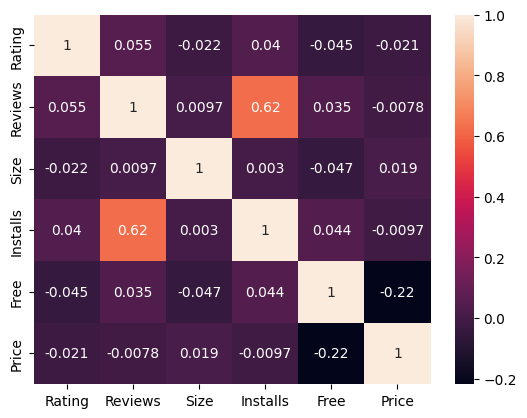

In [144]:
def compute_correlations_matrix(dataset):
    """Ma'lumotlar to'plamining ta'riflar matritsasi"""
    corr = dataset.select_dtypes(include=np.number).corr()
    sns.heatmap(corr, annot=True)
    plt.show()
compute_correlations_matrix(df)

In [145]:
df

,App,Category,Rating,Reviews,Size,Installs,Free,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art and design,4.1,159,19.000000,10000,1,0.0,Everyone,Art and Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,Art and design,3.9,967,14.000000,500000,1,0.0,Everyone,"Art and Design, Pretend Play",2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art and design,4.7,87510,8.700000,5000000,1,0.0,Everyone,Art and Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,Art and design,4.5,215644,25.000000,50000000,1,0.0,Teen,Art and Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,Art and design,4.3,967,2.800000,100000,1,0.0,Everyone,"Art and Design, Creativity",2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,FR Calculator,Family,4.0,7,2.600000,500,1,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
8186,Sya9a Maroc - FR,Family,4.5,38,53.000000,5000,1,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
8187,Fr. Mike Schmitz Audio Teachings,Family,5.0,4,3.600000,100,1,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
8188,The SCP Foundation DB fr nn5n,Books and reference,4.5,114,37.401281,1000,1,0.0,Mature 17,Books and Reference,2015-01-19,Varies with device,Varies with device


In [146]:
df_family = df[df['Category']=='Family']
df_family = df_family[df_family['Free']==0]
df_family.sort_values(by='Installs', ascending=False, inplace=True)

In [147]:
df_family = df_family.head(10)

In [148]:
fig = px.bar(x=df_family['App'], y=df_family['Installs'], width=1000, height=700, color=df_family['App'], title="The most populars paid apps of Family category")
fig.show()

In [149]:
fig = px.pie(df_family, values='Installs', names='App', title='Most popular genres according to the number of installations from paid family', width=1000, height=700,)
fig.show()

In [150]:
# An array with the number of installation per category
df_per_categories = df.groupby(by="Category")['Installs'].sum()
df_per_categories.sort_values(ascending=False, inplace=True)

In [151]:
# Plot a pie with the number of installation per category
fig = px.pie(df_per_categories.head(n=10), values='Installs', names=df_per_categories.head(n=10).index, title='The number of installation per category', width=1000, height=700,)
fig.show()

In [152]:
# Plot a bar with the mean price per category
df_per_categories_mean_price = df.groupby(by="Category")['Price'].mean()
df_per_categories_mean_price.sort_values(ascending=False, inplace=True)

In [153]:
# Plot a bar with the mean price per category
fig = px.pie(df_per_categories_mean_price.head(n=10), values='Price', names=df_per_categories_mean_price.head(n=10).index, title='The mean price per category', width=1000, height=700,)
fig.show()